# Lending Case Study

We will use the following steps to come up with the final recommendations for this case study :-
<br>A.  Understanding the Data​
<br>B.  Data Cleaning and Processing​
<br>C.  Univariate Analysis ​
<br>D.  Segmented Univariate Analysis to find key insights​
<br>E.  Bivariate Analysis to conclude insights generated from above step and finding new insights​



### 0. Importing libraries

In [666]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 00. Loading the dataset

In [667]:
loan_raw_data = pd.read_csv('loan.csv')

### A. Understanding the dataset

In [668]:
#understanding the values of columns by seeing its initial rows
loan_raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [669]:
#Shape of the data : 39717 rows & 111 columns
loan_raw_data.shape

(39717, 111)

In [670]:
#Understand the data types present in the dataset
loan_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [671]:
#Distinct values and their counts of our key variable
loan_raw_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [672]:
# Understand numberical variables
loan_raw_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [673]:
#Understand whether NULL values are there or not
loan_raw_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [674]:
# Correlation between numerical variables
loan_raw_data.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,NaN,NaN,NaN,NaN,-0.009505,NaN,NaN,NaN,NaN,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,NaN,NaN,NaN,NaN,-0.008769,NaN,NaN,NaN,NaN,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,...,NaN,NaN,NaN,NaN,-0.037180,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,...,NaN,NaN,NaN,NaN,-0.038502,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,NaN,NaN,NaN,NaN,-0.042746,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tax_liens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tot_hi_cred_lim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations : <br> This dataset has 111 columns and with 39,717 rows.<br> Each row is line of credit for the period of 2007 to 2011.<br> A lot of columns can be removed which will be done in the data cleaning step. <br>
 There are 3 types loan Statuses :-
           <br>  Fully Paid:- Who have cleared their loans
   <br> Current:-  Who are in the process repayment of their installments
   <br> Charged Off- Who could not clear their loans and hence are defaulters


### B. Data Cleaning

In [675]:
loan_raw_data.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No Duplicate records found

In [676]:
#Removing columns which are completely null
null_count = pd.DataFrame(loan_raw_data.isnull().sum()).reset_index(drop= False)
null_count.columns = ['Column Name', 'Null Count']

#creating a list of columns to delete
columns_to_delete = list(null_count[null_count['Null Count'] == loan_raw_data.shape[0]]['Column Name']) #1st list of columns to delete

In [677]:
len(columns_to_delete)

54

In [678]:
#Deleting descriptive columns which are not necessary in the scope of the analysis as determined by visual inspection
df_v2=loan_raw_data.copy()
df_v2.drop(columns = ['url', 'desc'], inplace = True)
columns_in_df = list(df_v2.columns)
df_v2.shape

(39717, 109)

In [679]:
#Deleting the columns which have only one unique value
unique_values = pd.DataFrame(df_v2.nunique()).reset_index()
single_unique_values = unique_values[unique_values[0] == 1]['index']
columns_to_delete.extend(list(single_unique_values))#2nd list of columns to delete

In [680]:
len(single_unique_values)

9

In [681]:
columns_to_keep =  [x for x in columns_in_df if x not in columns_to_delete]

In [682]:
loan_filtered = df_v2[columns_to_keep]

In [683]:
loan_filtered.shape

(39717, 46)

In [684]:
#Converting date columns from string to datetime
loan_filtered['issue_d']=pd.to_datetime(loan_filtered.issue_d.str.upper(),format='%b-%y',yearfirst=False)
loan_filtered['earliest_cr_line']=pd.to_datetime(loan_filtered.earliest_cr_line.str.upper(),format='%b-%y',yearfirst=False)

In [685]:
#Removing identifier columns
loan_filtered.drop(columns = ['id', 'member_id'], inplace = True)

In [686]:
#OUTLIER TREATMENT 
dummy_df=loan_filtered.copy()

cols = ['annual_inc'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = dummy_df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = dummy_df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((dummy_df[cols] < (Q1 - 1.5 * IQR)) | (dummy_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_df = dummy_df[condition]

loan_filtered=filtered_df

In [687]:
loan_filtered.shape

(37874, 44)

In [688]:
#Cleaning the continuos variable columns
loan_filtered['int_rate'] = loan_filtered['int_rate'].astype(str).str.strip("%")
loan_filtered['int_rate'] = loan_filtered['int_rate'].astype(float)

Summary of the  Data Cleaning steps perfomed above:-<br> 1.The data is unique at the column ‘id’ level. There were no duplicates at an overall level. ​
<br> 2.Based on data understanding and its business application, removed purely descriptive columns ‘url’ and ‘desc’ which do not contribute to the  analysis.​
<br>3.Removed columns which were completely null or had 0. This removed 63 columns.​
<br>4.Removed columns which have only 1 unique value. This removed 9 columns.​
<br>5.Removed identifier columns: id and loan id. ​
<br>6.Changed data type to Datetime from string for 2 columns: ‘issue_d’ and ‘earliest_cr_line’.​
<br>7.Upon completing the above cleaning steps, we were left with 44 columns. ​
<br>8.The data was filtered out for ‘loan_status’ as current to limit the scope of analysis to just ‘Fully Paid’ and ‘Charged off’ loans. ​
<br>9.Outlier Treament was perfomed for Annual Income
<br>10.Interest rate column was also treated by string "%" and making it a float

### C. Univariate Data Analysis on Categorical and Continous Variables

#### 1. Categorical Variables

#### 1.1 Loan Status 

In [689]:
loan_filtered['loan_status'].value_counts()

Fully Paid     31386
Charged Off     5431
Current         1057
Name: loan_status, dtype: int64

In [690]:
#Removing current loans from scope of analysis to limit focus on loans which are fully paid or which have defaulted
loan_filtered = loan_filtered[loan_filtered['loan_status'] != "Current"]

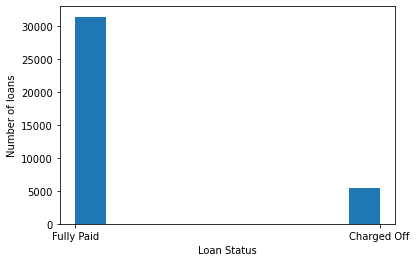

In [691]:
plt.hist(loan_filtered['loan_status'],  
         histtype ='bar')
plt.xlabel('Loan Status')
plt.ylabel("Number of loans")
plt.show()

#### 1.2. Loan Term 

In [692]:
loan_filtered['term'].value_counts()

 36 months    27838
 60 months     8979
Name: term, dtype: int64

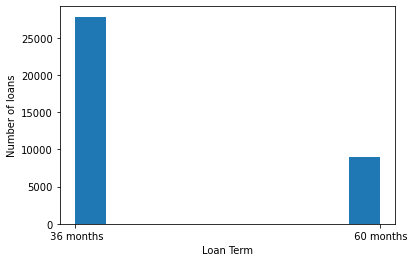

In [693]:
plt.hist(loan_filtered['term'],  
         histtype ='bar')
plt.xlabel('Loan Term')
plt.ylabel("Number of loans")
plt.show()

#### 1.3. Loan Grade 

In [694]:
loan_filtered['grade'].value_counts()

B    11152
A     9685
C     7506
D     4856
E     2461
F      890
G      267
Name: grade, dtype: int64

In [695]:
loan_filtered.sort_values(by = "grade", ascending = True, inplace = True)

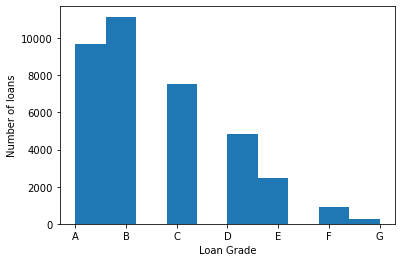

In [696]:
plt.hist(loan_filtered['grade'],  
         histtype ='bar')
plt.xlabel('Loan Grade')
plt.ylabel("Number of loans")
plt.show()

#### 1.4.  Home Ownership

In [697]:
loan_filtered['home_ownership'].value_counts()

RENT        18064
MORTGAGE    15795
OWN          2862
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

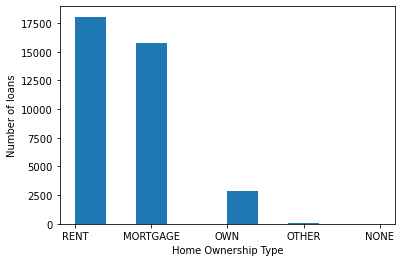

In [698]:
plt.hist(loan_filtered['home_ownership'],  
         histtype ='bar')
plt.xlabel('Home Ownership Type')
plt.ylabel("Number of loans")
plt.show()

#### 1.5. Loan Purpose 

In [699]:
loan_filtered['purpose'].value_counts()

debt_consolidation    17379
credit_card            4803
other                  3712
home_improvement       2584
major_purchase         2054
small_business         1629
car                    1456
wedding                 896
medical                 642
moving                  550
vacation                366
house                   338
educational             313
renewable_energy         95
Name: purpose, dtype: int64

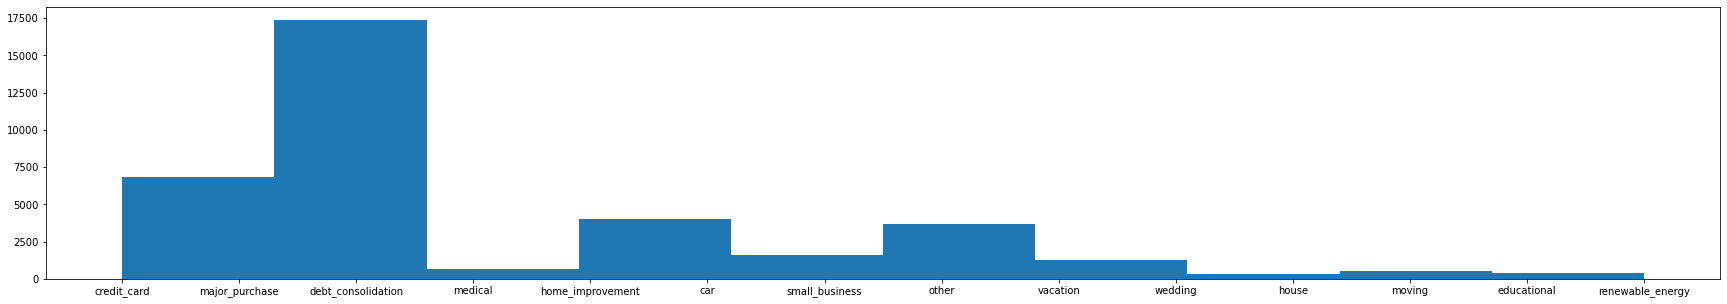

In [700]:
fig = plt.figure(figsize = (30,5))
plt.hist(loan_filtered['purpose'],  
         histtype ='bar')
plt.show()

#### 2. Continous Variables

In [701]:
#Exploration on which continous variables to choose
#Impact of different continuous variables on loan status
df_impact = pd.DataFrame(loan_filtered.groupby(['loan_status']).mean()).transpose()
df_impact

loan_status,Charged Off,Fully Paid
loan_amnt,11832.411158,10512.031638
funded_amnt,11504.851777,10279.210476
funded_amnt_inv,10638.009687,9791.466499
int_rate,13.763178,11.565851
installment,328.484191,309.836344
annual_inc,56650.282105,62013.959320
dti,14.102541,13.322512
delinq_2yrs,0.168477,0.141178
inq_last_6mths,1.056711,0.831071
mths_since_last_delinq,36.264463,35.922507


As we can see there are multiple variables which display a marked change across fully paid and unpaid loans. We will refer to the variables with the highest differences to analyze at multiple categorical variables to see if these differences hold true. Variables like last_pymnt_amnt, collection_recovery_fee, total_rec_prncp which have a huge difference but their difference can be justified by the fact that the loan itself has not been repaid.

#### 2.1.  Loan Amount

In [702]:
loan_filtered['loan_amnt'].describe()

count    36817.000000
mean     10706.805280
std       7067.980083
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [703]:
bins = [0, 5000, 10000, 15000, 20000, 25000,30000,35000]
names = ['<5K', '5-10K', '10-15K', '15-20K', '20-25K','25-30K','30-35K']

loan_filtered['loan_amount_ranges'] = pd.cut(loan_filtered['loan_amnt'], bins, labels=names)
loan_filtered.sort_values(by = 'loan_amnt', ascending = True, inplace = True)

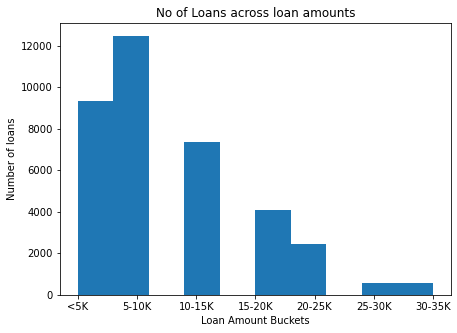

In [704]:
fig = plt.figure(figsize = (7,5))
plt.hist(loan_filtered['loan_amount_ranges'],
         histtype ='bar')
plt.xlabel('Loan Amount Buckets')
plt.ylabel("Number of loans")
plt.title("No of Loans across loan amounts")
plt.show()

#### 2.2.  Annual Income


In [705]:
loan_filtered['annual_inc'].describe()

count     36817.000000
mean      61222.745181
std       28230.572587
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145008.000000
Name: annual_inc, dtype: float64

In [706]:
bins = [0, 10000, 50000, 100000, 500000, np.inf]
names = ['<25K', '25-50K', '50k-75k', '75k-100k', '>100k']

loan_filtered['annual_inc_ranges'] = pd.cut(loan_filtered['annual_inc'], bins, labels=names)
loan_filtered.sort_values(by = 'annual_inc', ascending = True, inplace = True)

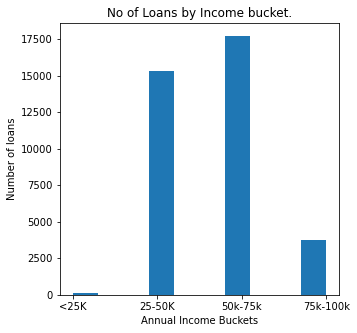

In [707]:
fig = plt.figure(figsize = (5,5))
plt.hist(loan_filtered['annual_inc_ranges'],histtype ='bar')
plt.xlabel('Annual Income Buckets')
plt.ylabel("Number of loans")
plt.title("No of Loans by Income bucket.")
plt.show()

### D. Understanding Impact of Variables Through Segmented Univariate Analysis 

In [708]:
loan_filtered_analyse=loan_filtered.copy()

#For our analysis 'Charged Off' or default loans are flagged as 1 and 'Fully Paid' as 0 .
#Making it a continous varible will make our job easier
loan_filtered_analyse['loan_status'] = loan_filtered_analyse['loan_status']. replace(['Fully Paid','Charged Off'],[0,1])

In [709]:
len(loan_filtered_analyse)

36817

In [710]:
loan_filtered_analyse['loan_status'].dtype

dtype('int64')

In [711]:
set(loan_filtered_analyse['loan_status'])

{0, 1}

#### 1. Employment title over loan status 

In [712]:
emp_title_grouped_by= loan_filtered_analyse.groupby(['emp_title']).aggregate({'purpose':'count','loan_status':'mean'}).reset_index().sort_values(by='purpose',ascending=False)

In [713]:
emp_title_grouped_by.head(20)

,emp_title,purpose,loan_status
21672,US Army,129,0.139535
2194,Bank of America,106,0.188679
482,AT&T,57,0.210526
11317,Kaiser Permanente,53,0.150943
10181,IBM,53,0.113208
21825,USAF,52,0.038462
21667,US Air Force,51,0.117647
21649,UPS,51,0.235294
23102,Wells Fargo,49,0.081633
22903,Walmart,44,0.318182


In [714]:
#Limiting emp_title to occurences above 30
emp_title_grouped_top=emp_title_grouped_by[emp_title_grouped_by['purpose']>30]

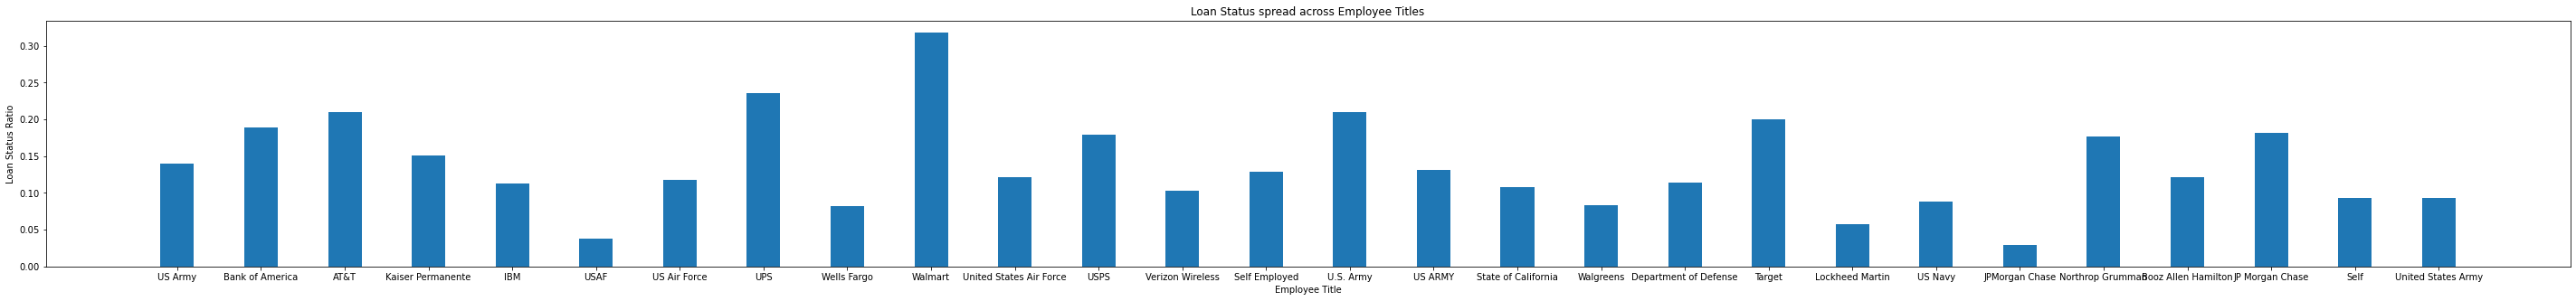

In [715]:
fig = plt.figure(figsize = (50,5))
plt.bar(emp_title_grouped_top['emp_title'], emp_title_grouped_top['loan_status'],
        width = 0.4)
plt.xlabel("Employee Title")
plt.ylabel("Loan Status Ratio")
plt.title("Loan Status spread across Employee Titles")
plt.show()

Considering the lack of patterns and high distinct number of unique variables, nothing conclusive can be observed from the data.

#### 2. Loan term over loan status 

In [716]:
term_grouped_by= loan_filtered_analyse.groupby(['term']).aggregate({'purpose':'count','loan_status':'mean'}).reset_index().sort_values(by='purpose',ascending=False)

In [717]:
term_grouped_by

,term,purpose,loan_status
0,36 months,27838,0.112077
1,60 months,8979,0.257378


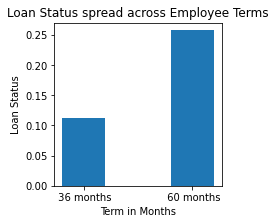

In [718]:
fig = plt.figure(figsize = (3,3))
plt.bar(term_grouped_by['term'], term_grouped_by['loan_status'], width = 0.4)
plt.xlabel("Term in Months")
plt.ylabel("Loan Status")
plt.title("Loan Status spread across Employee Terms")
plt.show()

###### Longer duration loans are more likely to be charged off / defaulted. 

#### 3. Employment length over loan status 

In [719]:
emp_length_grouped_by= loan_filtered_analyse.groupby(['emp_length']).aggregate({'purpose':'count','loan_status':'mean'}).reset_index().sort_values(by='purpose',ascending=False)

In [720]:
emp_length_grouped_by

,emp_length,purpose,loan_status
1,10+ years,7934,0.160827
10,< 1 year,4350,0.141839
2,2 years,4117,0.133107
3,3 years,3842,0.139771
4,4 years,3213,0.138189
0,1 year,3056,0.147251
5,5 years,3056,0.144306
6,6 years,2081,0.142720
7,7 years,1647,0.153005
8,8 years,1348,0.143917


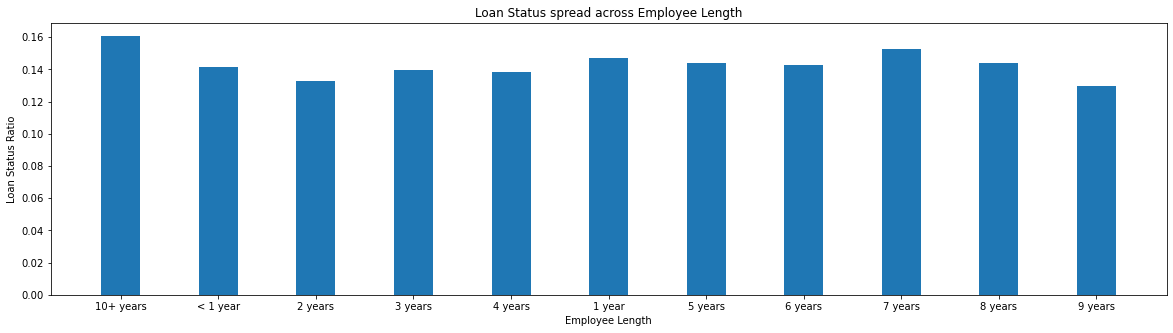

In [721]:
fig = plt.figure(figsize = (20,5))
plt.bar(emp_length_grouped_by['emp_length'], emp_length_grouped_by['loan_status'], width = 0.4)
plt.xlabel("Employee Length")
plt.ylabel("Loan Status Ratio")
plt.title("Loan Status spread across Employee Length")
plt.show()

No Conclusive insight can be generated from the length of employment.

#### 4. Loan Grade over loan status 

In [722]:
loan_grade_grouped_by= loan_filtered_analyse.groupby(['grade']).aggregate({'purpose':'count','loan_status':'mean'}).reset_index().sort_values(by='purpose',ascending=False)

In [723]:
loan_grade_grouped_by.sort_values(by = ['grade'], ascending = True, inplace = True)
loan_grade_grouped_by

,grade,purpose,loan_status
0,A,9685,0.061229
1,B,11152,0.123745
2,C,7506,0.176659
3,D,4856,0.223023
4,E,2461,0.268996
5,F,890,0.326966
6,G,267,0.359551


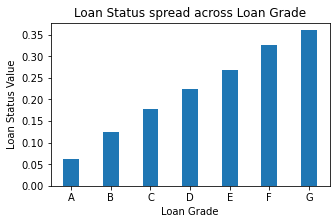

In [724]:
fig = plt.figure(figsize = (5,3))
plt.bar(loan_grade_grouped_by['grade'], loan_grade_grouped_by['loan_status'], width = 0.4)
plt.xlabel("Loan Grade")
plt.ylabel("Loan Status Value")
plt.title("Loan Status spread across Loan Grade")
plt.show()

#####  The graph suggests the defaulting chances of a loan increases as we move from Grade A to Grade G

#### 5. Loan Purpose over loan status 

In [725]:
loan_purpose_grouped_by= loan_filtered_analyse.groupby(['purpose']).aggregate({'term':'count','loan_status':'mean'}).reset_index().sort_values(by='term',ascending=False)

In [726]:
loan_purpose_grouped_by

,purpose,term,loan_status
2,debt_consolidation,17379,0.154439
1,credit_card,4803,0.108682
9,other,3712,0.163524
4,home_improvement,2584,0.124613
6,major_purchase,2054,0.105648
11,small_business,1629,0.278699
0,car,1456,0.109203
13,wedding,896,0.103795
7,medical,642,0.161994
8,moving,550,0.163636


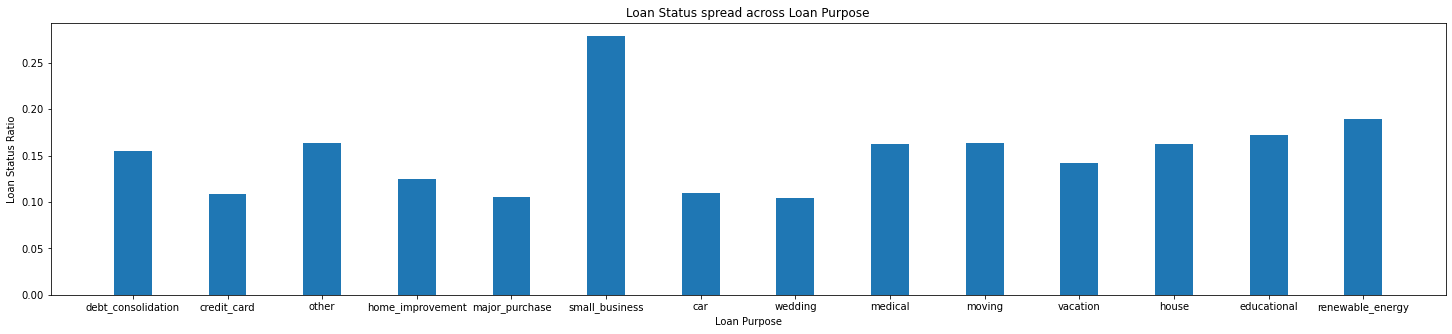

In [727]:
fig = plt.figure(figsize = (25,5))
plt.bar(loan_purpose_grouped_by['purpose'], loan_purpose_grouped_by['loan_status'], width = 0.4)
plt.xlabel("Loan Purpose")
plt.ylabel("Loan Status Ratio")
plt.title("Loan Status spread across Loan Purpose")
plt.show()

##### Small business(27% defaulting rate) loans have atleast 50% higher chanches of defaulting as compared to all other purposes(<=18% of defaulting rate)

#### 6. Home Ownership over loan status 

In [728]:
home_ownership_grouped_by= loan_filtered_analyse.groupby(['home_ownership']).aggregate({'term':'count','loan_status':'mean'}).reset_index().sort_values(by='term',ascending=False)

In [729]:
home_ownership_grouped_by

,home_ownership,term,loan_status
4,RENT,18064,0.153565
0,MORTGAGE,15795,0.139538
3,OWN,2862,0.152341
2,OTHER,93,0.182796
1,NONE,3,0.000000


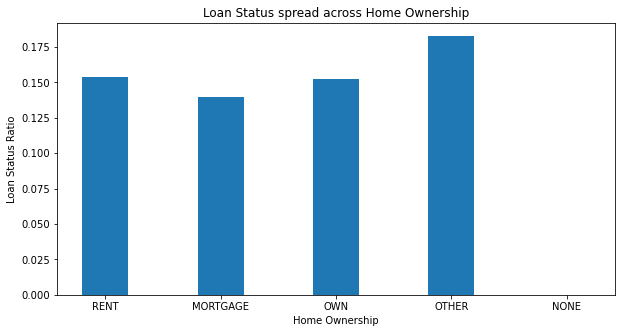

In [730]:
fig = plt.figure(figsize = (10,5))
plt.bar(home_ownership_grouped_by['home_ownership'], home_ownership_grouped_by['loan_status'], width = 0.4)
plt.xlabel("Home Ownership")
plt.ylabel("Loan Status Ratio")
plt.title("Loan Status spread across Home Ownership")
plt.show()

No Significant Insight

#### 7. dti over loan status 

In [731]:
loan_filtered_analyse.sort_values(by = 'dti', ascending = False, inplace = True)
dti_grouped_by = pd.DataFrame(loan_filtered_analyse.groupby(['loan_status'])['dti'].mean()).reset_index()

In [732]:
dti_grouped_by['loan_status'] = dti_grouped_by['loan_status'].astype(str)

In [733]:
dti_grouped_by

,loan_status,dti
0,0,13.322512
1,1,14.102541


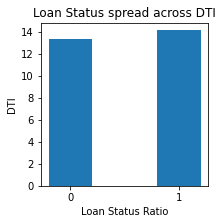

In [734]:
fig = plt.figure(figsize = (3,3))
plt.bar(dti_grouped_by['loan_status'], dti_grouped_by['dti'], width = 0.4)
plt.xlabel("Loan Status Ratio")
plt.ylabel("DTI")
plt.title("Loan Status spread across DTI")
plt.show()

##### Loans that are not repaid have a higher dti, meaning the ratio of the installments or EMI amount per month is higher for unpaid loans. To be verified with bivariate analysis.

#### 8. Loan Amount over loan status 

In [735]:
loan_filtered_analyse.sort_values('loan_amnt', ascending = False, inplace = True)
Loan_amount_grouped_by= loan_filtered_analyse.groupby(['loan_amount_ranges']).aggregate({'term':'count','loan_status':'mean'}).reset_index().sort_values(by='term',ascending=False)

In [736]:
Loan_amount_grouped_by

,loan_amount_ranges,term,loan_status
1,5-10K,12467,0.129141
0,<5K,9335,0.139261
2,10-15K,7358,0.139712
3,15-20K,4074,0.177712
4,20-25K,2446,0.199509
5,25-30K,587,0.212947
6,30-35K,550,0.283636


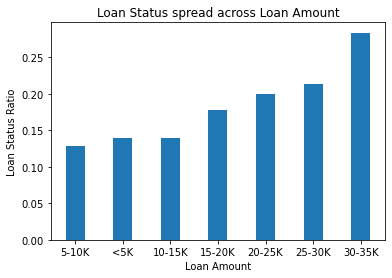

In [737]:
fig = plt.figure(figsize = (6,4))

plt.bar(Loan_amount_grouped_by['loan_amount_ranges'], Loan_amount_grouped_by['loan_status'], width = 0.4)
plt.xlabel("Loan Amount")
plt.ylabel("Loan Status Ratio")
plt.title("Loan Status spread across Loan Amount")
plt.show()

##### Higher loan amounts have a higher tendency of defauting.

#### 9. Annual income over Loan Status 

In [738]:
loan_filtered_analyse.sort_values(by = 'annual_inc', ascending = True, inplace = True)
annual_inc_grouped_by= loan_filtered_analyse.groupby(['annual_inc_ranges']).aggregate({'term':'count','loan_status':'mean'}).reset_index().sort_values(by='term',ascending=False)

In [739]:
annual_inc_grouped_by.sort_index(inplace = True)

In [740]:
annual_inc_grouped_by

,annual_inc_ranges,term,loan_status
0,<25K,98,0.204082
1,25-50K,15291,0.169577
2,50k-75k,17707,0.136782
3,75k-100k,3721,0.106423
4,>100k,0,NaN


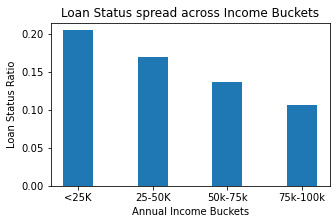

In [741]:
fig = plt.figure(figsize = (5,3))
plt.bar(annual_inc_grouped_by['annual_inc_ranges'], annual_inc_grouped_by['loan_status'], width = 0.4)
plt.xlabel("Annual Income Buckets")
plt.ylabel("Loan Status Ratio")
plt.title("Loan Status spread across Income Buckets")
plt.show()

##### Lower the annual income higher becomes the chanches of defaulting. 

#### 10. Borrowing Experience

In [742]:
loan_filtered_analyse['issue_d'] = pd.to_datetime(loan_filtered_analyse['issue_d'])
loan_filtered_analyse['earliest_cr_line'] = pd.to_datetime(loan_filtered_analyse['earliest_cr_line'])
loan_filtered_analyse['Difference'] = (loan_filtered_analyse['issue_d'] - loan_filtered_analyse['earliest_cr_line']).dt.days

In [743]:
df_borrowing_experience = pd.DataFrame(loan_filtered_analyse.groupby('loan_status')['Difference'].mean())

In [744]:
df_borrowing_experience

,Difference
loan_status,
0,4879.852737
1,4769.089118


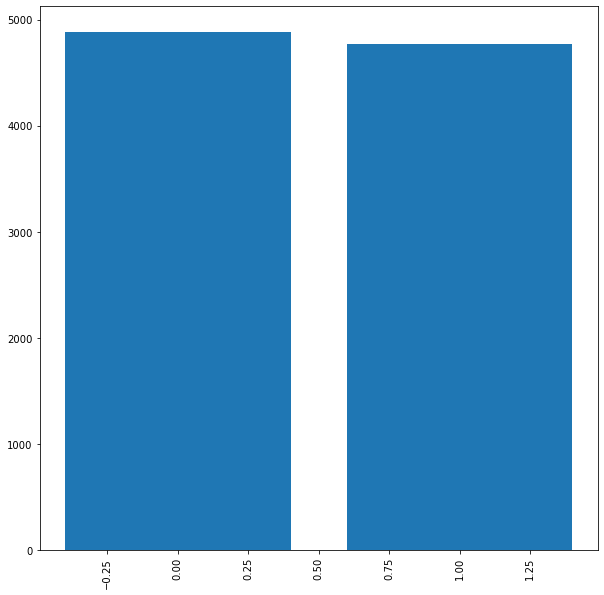

In [745]:
fig = plt.figure(figsize = (10,10))
plt.bar(df_borrowing_experience.index, df_borrowing_experience['Difference'])
plt.xticks(rotation = 90)
plt.show()

The difference between the average value of the derieved variable of borrowing experience is negliglible across loan status to draw conclusion.

### G. Bivariate Analysis

### 1. Analyzing the impact of loan amount across different categorical values to see if the pattern observed above holds up

#### 1.1. Analyzing impact of loan amount on loan repayment by state

In [746]:
df_loan_impact_across_states = pd.pivot_table(loan_filtered_analyse, values = 'loan_amnt',index = ['addr_state'], columns = 'loan_status', aggfunc = np.mean)
df_loan_impact_across_states['Difference'] = df_loan_impact_across_states[1] - df_loan_impact_across_states[0]

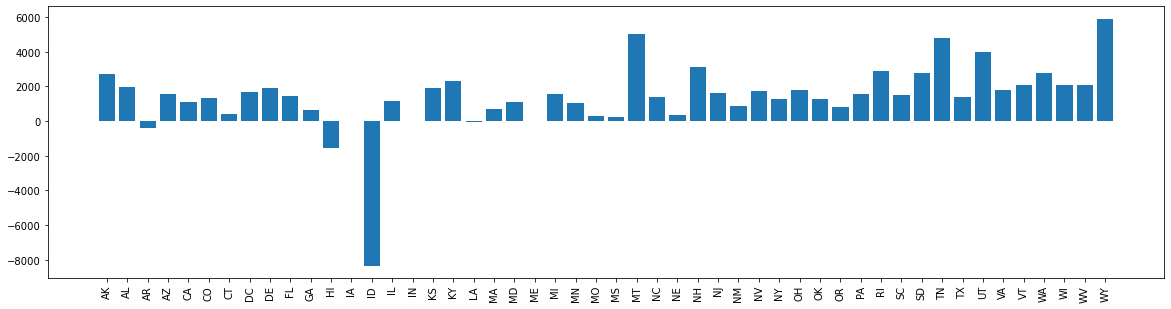

In [747]:
fig = plt.figure(figsize = (20,5))
plt.bar(df_loan_impact_across_states.index, df_loan_impact_across_states['Difference'])
plt.xticks(rotation = 90)
plt.show()

###### By seeing a Positive difference between the mean of loan amounts between "Charged Off" and "Fully Paid" loans across majority of the states , we further validate that higher loan amounts leads to defaulting of loans

#### 1.2. Analyzing impact of loan amount on loan repayment by grade

In [748]:
df_loan_impact_across_grades = pd.pivot_table(loan_filtered_analyse, values = 'loan_amnt',index = ['grade'], columns = 'loan_status', aggfunc = np.mean)
df_loan_impact_across_grades['Difference'] = df_loan_impact_across_grades[1] - df_loan_impact_across_grades[0]

In [749]:
df_loan_impact_across_grades

loan_status,0,1,Difference
grade,,,
A,8499.997250,7729.426644,-770.570606
B,10604.684302,10686.304348,81.620046
C,10407.811489,10958.484163,550.672674
D,11729.552081,12049.492151,319.940071
E,14957.267927,15383.874622,426.606696
F,16763.355593,18582.646048,1819.290455
G,20435.233918,18322.395833,-2112.838085


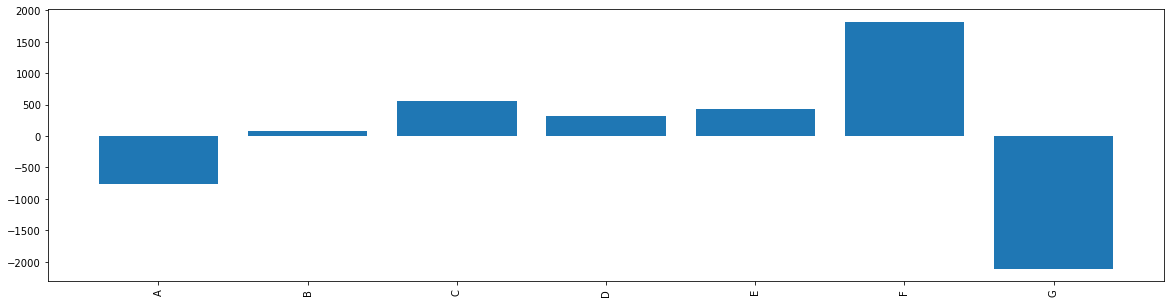

In [750]:
fig = plt.figure(figsize = (20,5))
plt.bar(df_loan_impact_across_grades.index, df_loan_impact_across_grades['Difference'])
plt.xticks(rotation = 90)
plt.show()

#### 1.3. Analyzing impact of loan amount on loan repayment by home ownership

In [751]:
df_loan_impact_across_hw = pd.pivot_table(loan_filtered_analyse, values = 'loan_amnt',index = ['home_ownership'], columns = 'loan_status', aggfunc = np.mean)
df_loan_impact_across_hw['Difference'] = df_loan_impact_across_hw[1] - df_loan_impact_across_hw[0]

In [752]:
df_loan_impact_across_hw

loan_status,0,1,Difference
home_ownership,,,
MORTGAGE,11713.310279,13735.549002,2022.238723
NONE,5600.000000,NaN,NaN
OTHER,9855.592105,13379.411765,3523.819659
OWN,9627.019786,10990.711009,1363.691224
RENT,9588.884892,10443.141673,854.256781


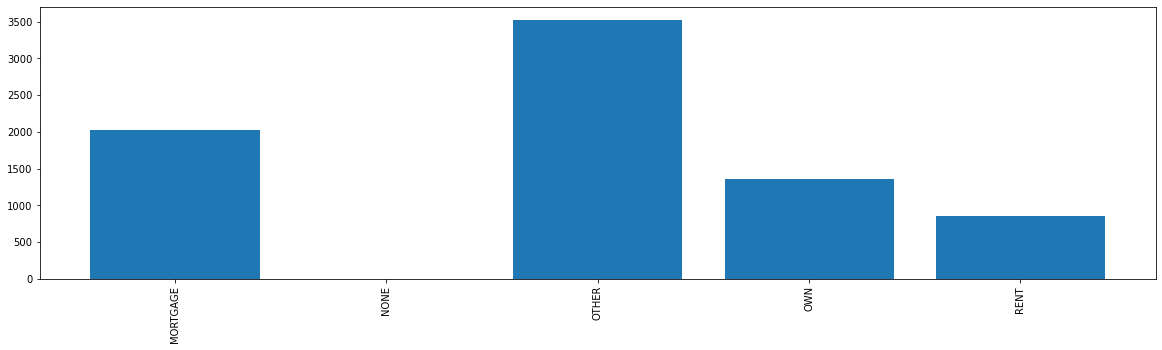

In [753]:
fig = plt.figure(figsize = (20,5))
plt.bar(df_loan_impact_across_hw.index, df_loan_impact_across_hw['Difference'])
plt.xticks(rotation = 90)
plt.show()

###### Again a positive difference here across means of Charged Off and Fully Paids loans for all acategories of Home ownership validates that higher loans have higher defaulting rate

#### Reminder: 1 represents loans which have been charged off (default) and 0 represents loans which are cleared. 

### 2. Analyzing the impact of annual income across different categorical values to see if the pattern observed above holds up

#### 2.1. Analyzing impact of annual income on loan repayment by grade

In [754]:
df_ai_impact_across_grades = pd.pivot_table(loan_filtered_analyse, values = 'annual_inc',index = ['grade'], columns = 'loan_status', aggfunc = np.mean)
df_ai_impact_across_grades['Difference'] = df_ai_impact_across_grades[1] - df_ai_impact_across_grades[0]

In [755]:
df_ai_impact_across_grades

loan_status,0,1,Difference
grade,,,
A,61487.355095,50612.631315,-10874.723779
B,61249.012769,54040.542087,-7208.470682
C,60536.296309,55280.132994,-5256.163315
D,62210.185945,57774.742068,-4435.443877
E,67963.022941,61637.358958,-6325.663983
F,72907.515893,67835.764227,-5071.751666
G,82054.496374,69404.194062,-12650.302312


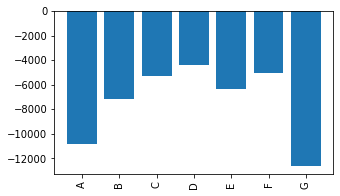

In [756]:
fig = plt.figure(figsize = (5,3))
plt.bar(df_ai_impact_across_grades.index, df_ai_impact_across_grades['Difference'])
plt.xticks(rotation = 90)
plt.show()

###### By seeing a Negative difference between the mean of Annual Incomes between "Charged Off" and "Fully Paid" loans across all the Grades , we further validate that lower Annual income leads to defaulting of loans

#### 2.2. Analyzing impact of annual income on loan repayment by state

In [757]:
df_ai_impact_across_state = pd.pivot_table(loan_filtered_analyse, values = 'annual_inc',index = ['addr_state'], columns = 'loan_status', aggfunc = np.mean)
df_ai_impact_across_state['Difference'] = df_ai_impact_across_state[1] - df_ai_impact_across_state[0]

In [758]:
df_ai_impact_across_state

loan_status,0,1,Difference
addr_state,,,
AK,65222.189655,59947.849231,-5274.340424
AL,58923.645822,50158.230000,-8765.415822
AR,56075.254286,49529.038462,-6546.215824
AZ,60335.608212,53550.188718,-6785.419494
CA,64487.940890,59813.304856,-4674.636034
CO,60683.366836,54296.947917,-6386.418920
CT,64027.393396,58202.106522,-5825.286874
DC,71888.880000,66605.541538,-5283.338462
DE,61825.309278,58246.166667,-3579.142612


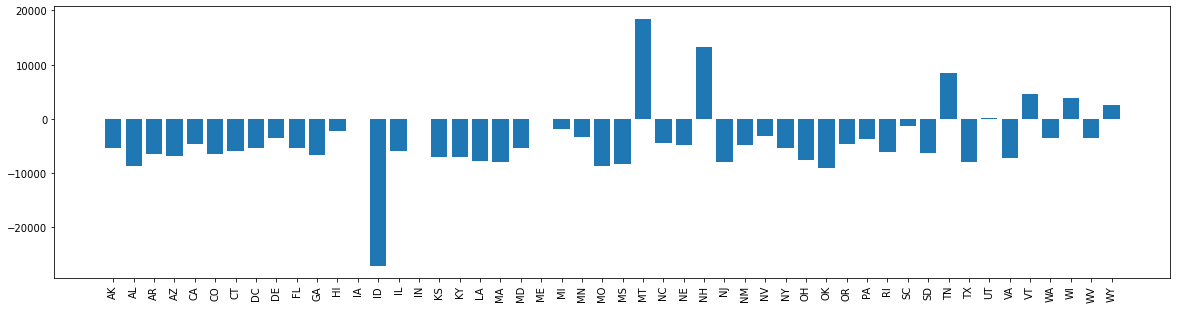

In [759]:
fig = plt.figure(figsize = (20,5))
plt.bar(df_ai_impact_across_state.index, df_ai_impact_across_state['Difference'])
plt.xticks(rotation = 90)
plt.show()

#### 2.3. Analyzing impact of annual income on loan repayment by home ownership

In [760]:
df_ai_impact_across_hw = pd.pivot_table(loan_filtered_analyse, values = 'annual_inc',index = ['home_ownership'], columns = 'loan_status', aggfunc = np.mean)
df_ai_impact_across_hw['Difference'] = df_ai_impact_across_hw[1] - df_ai_impact_across_hw[0]

In [761]:
df_ai_impact_across_hw

loan_status,0,1,Difference
home_ownership,,,
MORTGAGE,72534.567805,66979.812314,-5554.755491
NONE,80733.333333,NaN,NaN
OTHER,61270.486842,55870.294118,-5400.192724
OWN,52809.796554,50149.013807,-2660.782747
RENT,54122.792201,49469.866889,-4652.925312


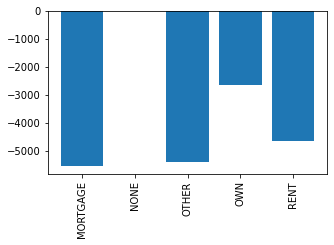

In [762]:
fig = plt.figure(figsize = (5,3))
plt.bar(df_ai_impact_across_hw.index, df_ai_impact_across_hw['Difference'])
plt.xticks(rotation = 90)
plt.show()

###### By seeing a Negative difference between the mean of Annual Incomes between "Charged Off" and "Fully Paid" loans across all the Home ownership , we further validate that lower Annual income leads to defaulting of loans​

### 3. Analyzing the impact of interest rates across different categorical values to see if the pattern observed above (Reference Section 1) holds up.

#### 3.1. Analyzing impact of interest rates on loan repayment by grade of loans

In [763]:
df_ir_impact_across_grade = pd.pivot_table(loan_filtered_analyse, values = 'int_rate',index = ['grade'], columns = 'loan_status', aggfunc = np.mean)
df_ir_impact_across_grade['Difference'] = df_ir_impact_across_grade[1] - df_ir_impact_across_grade[0]

In [764]:
df_ir_impact_across_grade

loan_status,0,1,Difference
grade,,,
A,7.311143,7.588870,0.277727
B,10.988378,11.127268,0.138890
C,13.516451,13.603303,0.086852
D,15.604789,15.842512,0.237722
E,17.506765,17.843323,0.336558
F,19.424341,20.017766,0.593426
G,21.146667,21.449167,0.302500


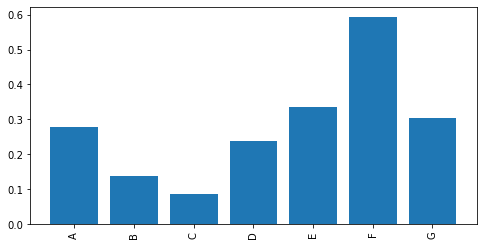

In [765]:
fig = plt.figure(figsize = (8,4))
plt.bar(df_ir_impact_across_grade.index, df_ir_impact_across_grade['Difference'])
plt.xticks(rotation = 90)
plt.show()

###### By seeing a positive difference between the interest rates for Charged Off and Fully paid loans across grades , we can conclude that higher interest rates create higher defaulting tendency

#### 3.2. Analyzing impact of interest rates on loan repayment by of states

In [766]:
df_ir_impact_across_state = pd.pivot_table(loan_filtered_analyse, values = 'int_rate',index = ['addr_state'], columns = 'loan_status', aggfunc = np.mean)
df_ir_impact_across_state['Difference'] = df_ir_impact_across_state[1] - df_ir_impact_across_state[0]

In [767]:
df_ir_impact_across_state

loan_status,0,1,Difference
addr_state,,,
AK,11.829828,15.475385,3.645557
AL,11.313854,14.502308,3.188453
AR,11.178670,13.580000,2.401330
AZ,11.779628,13.675812,1.896184
CA,11.710511,13.693630,1.983119
CO,11.307114,13.543021,2.235907
CT,11.362594,13.995543,2.632950
DC,11.703207,14.571538,2.868332
DE,11.791134,13.099167,1.308033


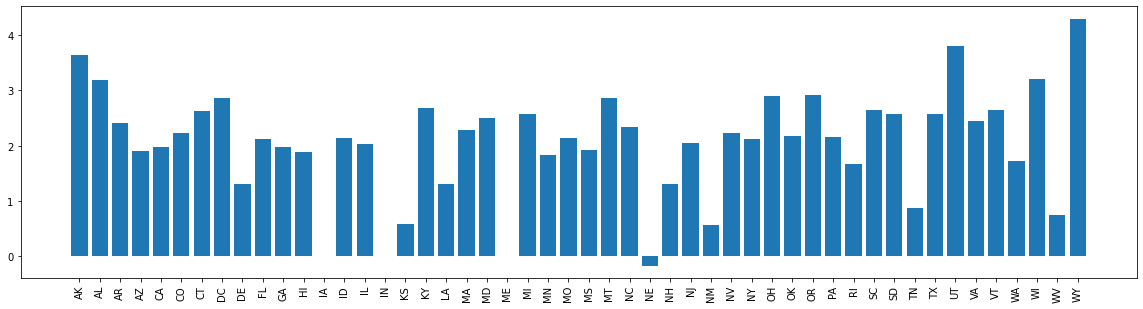

In [768]:
fig = plt.figure(figsize = (20,5))
plt.bar(df_ir_impact_across_state.index, df_ir_impact_across_state['Difference'])
plt.xticks(rotation = 90)
plt.show()

#### 3.3. Analyzing impact of interest rates on loan repayment by home ownership

In [769]:
df_ir_impact_across_hw = pd.pivot_table(loan_filtered_analyse, values = 'int_rate',index = ['home_ownership'], columns = 'loan_status', aggfunc = np.mean)
df_ir_impact_across_hw['Difference'] = df_ir_impact_across_hw[1] - df_ir_impact_across_hw[0]

In [770]:
df_ir_impact_across_hw

loan_status,0,1,Difference
home_ownership,,,
MORTGAGE,11.234352,13.702173,2.467821
NONE,8.696667,NaN,NaN
OTHER,11.817237,13.285882,1.468646
OWN,11.322271,13.701193,2.378921
RENT,11.898476,13.824315,1.925839


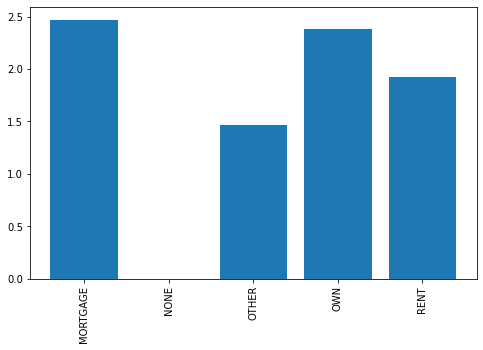

In [771]:
fig = plt.figure(figsize = (8,5))
plt.bar(df_ir_impact_across_hw.index, df_ir_impact_across_hw['Difference'])
plt.xticks(rotation = 90)
plt.show()

###### Again a positive difference between the interest rates between Charged Off and Fully Paid loans across home ownership suggest that higher interes rates have a higher defaulting tenendency

### 4. Analyzing the impact of loan period across different categorical values to see if the pattern observed above holds up.

#### 4.1. Analyzing impact of loan periods across grade to see impact on loan default

In [772]:
df_lp_impact_across_grade = pd.pivot_table(loan_filtered_analyse, values = 'loan_status',index = ['term'], columns = 'grade', aggfunc = np.mean)
df_lp_impact_across_grade

grade,A,B,C,D,E,F,G
term,,,,,,,
36 months,0.059798,0.106670,0.150571,0.182114,0.197500,0.242105,0.380000
60 months,0.095607,0.191451,0.249119,0.293655,0.303432,0.350000,0.354839


#### 4.2. Analyzing impact of loan periods across state to see impact on loan default

In [773]:
df_lp_impact_across_state = pd.pivot_table(loan_filtered_analyse, values = 'loan_status',index = ['term'], columns = 'addr_state', aggfunc = np.mean).transpose()
df_lp_impact_across_state

term,36 months,60 months
addr_state,,
AK,0.163265,0.227273
AL,0.080386,0.241071
AR,0.085714,0.203704
AZ,0.116861,0.216590
CA,0.130324,0.276070
CO,0.100176,0.222857
CT,0.086957,0.279070
DC,0.062893,0.078947
DE,0.094118,0.166667


In [774]:
df_lp_impact_across_state['Difference'] = df_lp_impact_across_state[' 60 months'] - df_lp_impact_across_state[' 36 months']

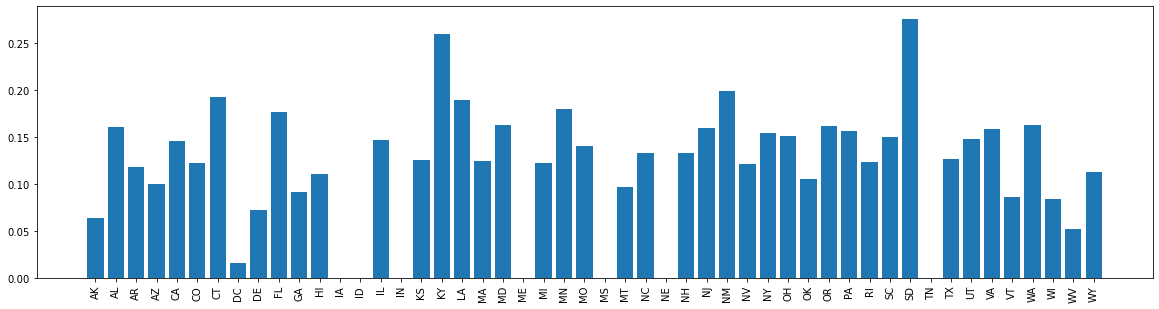

In [775]:
fig = plt.figure(figsize = (20,5))
plt.bar(df_lp_impact_across_state.index, df_lp_impact_across_state['Difference'])
plt.xticks(rotation = 90)
plt.show()

###### By seeing a Positive difference interms of  loan status for  60 and 36 months for all the states , we can be sure that higher loan term leads to defaulting ​

#### 4.3. Analyzing impact of loan periods across home ownership to see impact on loan default

In [776]:
df_lp_impact_across_hw= pd.pivot_table(loan_filtered_analyse, values = 'loan_status',index = ['term'], columns = 'home_ownership', aggfunc = np.mean).transpose()
df_lp_impact_across_hw

term,36 months,60 months
home_ownership,,
MORTGAGE,0.100117,0.234079
NONE,0.000000,NaN
OTHER,0.173913,1.000000
OWN,0.111815,0.289433
RENT,0.121012,0.280936


In [777]:
df_lp_impact_across_hw['Difference'] = df_lp_impact_across_hw[' 60 months'] - df_lp_impact_across_hw[' 36 months']

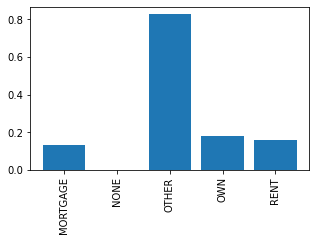

In [778]:
fig = plt.figure(figsize = (5,3))
plt.bar(df_lp_impact_across_hw.index, df_lp_impact_across_hw['Difference'])
plt.xticks(rotation = 90)
plt.show()

#####  We again conclude that the probability of a loan default increases with increase in the loan term (60 months).

### 5. Analyzing the impact of purpose of loan across different categorical values to see if the pattern observed above holds up.

#### 5.1. Analyzing impact of purpose of loans across state to see impact on loan default

In [779]:
df_purpose_impact_across_state = pd.pivot_table(loan_filtered_analyse, values = 'loan_status',index = ['purpose'], columns = 'addr_state', aggfunc = np.mean).transpose()
df_purpose_impact_across_state

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
addr_state,,,,,,,,,,,,,,
AK,0.000000,0.333333,0.200000,NaN,0.000000,NaN,0.000000,0.333333,NaN,0.000000,NaN,0.285714,1.000000,0.000000
AL,0.047619,0.139535,0.116822,0.250000,0.157895,0.000000,0.074074,0.250000,0.250000,0.147059,0.000000,0.150000,0.000000,0.200000
AR,0.176471,0.074074,0.090909,0.500000,0.090909,0.000000,0.000000,0.200000,NaN,0.238095,NaN,0.181818,0.333333,0.000000
AZ,0.117647,0.125000,0.158501,0.428571,0.033333,0.166667,0.122449,0.055556,0.117647,0.135802,0.333333,0.266667,0.000000,0.166667
CA,0.120930,0.136041,0.163297,0.232558,0.168675,0.237288,0.111842,0.130081,0.219048,0.176737,0.058824,0.287197,0.175000,0.148148
CO,0.068966,0.073770,0.146409,0.222222,0.131579,0.090909,0.058824,0.062500,0.000000,0.200000,0.000000,0.216216,0.200000,0.100000
CT,0.093750,0.123457,0.151899,0.000000,0.147541,0.166667,0.104167,0.111111,0.000000,0.111111,0.000000,0.291667,0.142857,0.000000
DC,0.000000,0.052632,0.067961,NaN,0.000000,0.000000,0.000000,0.000000,0.200000,0.153846,NaN,0.250000,0.000000,0.000000
DE,0.000000,0.230769,0.046512,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,NaN,0.500000,0.000000,0.000000


Difficult to conclude across so many states

#### 5.2. Analyzing impact of purpose of loans across grade to see impact on loan default

In [780]:
df_purpose_impact_across_grade = pd.pivot_table(loan_filtered_analyse, values = 'loan_status',index = ['purpose'], columns = 'grade', aggfunc = np.mean)
df_purpose_impact_across_grade

grade,A,B,C,D,E,F,G
purpose,,,,,,,
car,0.054795,0.121413,0.155844,0.196721,0.129630,0.400000,0.500000
credit_card,0.045858,0.092770,0.142714,0.166359,0.244813,0.233333,0.142857
debt_consolidation,0.063116,0.118282,0.170513,0.222265,0.270445,0.360784,0.364865
educational,0.050633,0.208333,0.157303,0.300000,0.428571,0.250000,0.000000
home_improvement,0.045198,0.115979,0.200436,0.220930,0.206897,0.250000,0.076923
house,0.031579,0.097826,0.209677,0.260870,0.370370,0.500000,0.500000
major_purchase,0.046541,0.089606,0.158904,0.225225,0.223529,0.080000,0.250000
medical,0.061224,0.157895,0.232000,0.243590,0.210526,0.333333,0.666667
moving,0.103659,0.200000,0.144144,0.203125,0.291667,0.111111,0.333333


#### 5.3. Analyzing impact of purpose of loans across home ownership to see impact on loan default

In [781]:
df_purpose_impact_across_hw = pd.pivot_table(loan_filtered_analyse, values = 'loan_status',index = ['purpose'], columns = 'home_ownership', aggfunc = np.mean)
df_purpose_impact_across_hw

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
purpose,,,,,
car,0.098291,NaN,0.500000,0.102740,0.122112
credit_card,0.106393,NaN,0.181818,0.132616,0.107549
debt_consolidation,0.156188,0.0,0.157895,0.156911,0.152753
educational,0.134146,NaN,0.000000,0.250000,0.182692
home_improvement,0.119094,NaN,0.200000,0.137124,0.153226
house,0.138211,NaN,0.000000,0.107143,0.188172
major_purchase,0.085181,NaN,0.000000,0.116592,0.121775
medical,0.154717,NaN,0.000000,0.156250,0.170968
moving,0.082474,NaN,1.000000,0.250000,0.175234


No conclusive impact of purpose on loan repayment cannot be measured.

### 6. Analyzing the impact of dti across different categorical values to see if the pattern observed above holds up.

#### 6.1. Analyzing impact of dti of loans across grades to see impact on loan default

In [782]:
df_dti_impact_across_grade = pd.pivot_table(loan_filtered_analyse, values = 'dti',index = ['grade'], columns = 'loan_status', aggfunc = np.mean)
df_dti_impact_across_grade['Difference'] = df_dti_impact_across_grade[1] - df_dti_impact_across_grade[0]

In [783]:
df_dti_impact_across_grade

loan_status,0,1,Difference
grade,,,
A,12.132706,13.423828,1.291122
B,13.520890,13.960094,0.439204
C,13.913633,14.471418,0.557785
D,14.063032,14.037258,-0.025774
E,14.190617,14.410408,0.219791
F,14.533022,14.202371,-0.330651
G,14.171813,13.558437,-0.613375


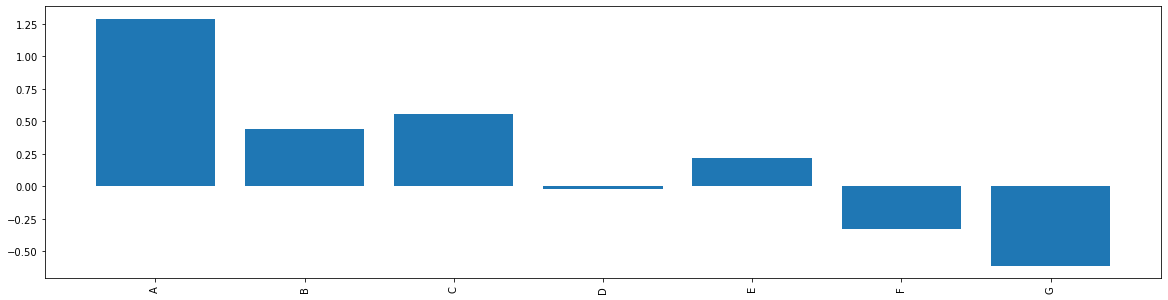

In [784]:
fig = plt.figure(figsize = (20,5))
plt.bar(df_dti_impact_across_grade.index, df_dti_impact_across_grade['Difference'])
plt.xticks(rotation = 90)
plt.show()

#### 6.2. Analyzing impact of dti of loans across states to see impact on loan default

In [785]:
df_dti_impact_across_state = pd.pivot_table(loan_filtered_analyse, values = 'dti',index = ['addr_state'], columns = 'loan_status', aggfunc = np.mean)
df_dti_impact_across_state['Difference'] = df_dti_impact_across_state[1] - df_dti_impact_across_state[0]

In [786]:
df_dti_impact_across_state

loan_status,0,1,Difference
addr_state,,,
AK,14.941897,16.617692,1.675796
AL,14.137790,13.871346,-0.266444
AR,15.050197,16.658846,1.608649
AZ,13.011116,14.003333,0.992217
CA,12.842769,13.641086,0.798317
CO,13.614074,14.072917,0.458843
CT,12.904522,13.436522,0.532000
DC,12.868478,9.793077,-3.075401
DE,14.181649,13.261667,-0.919983


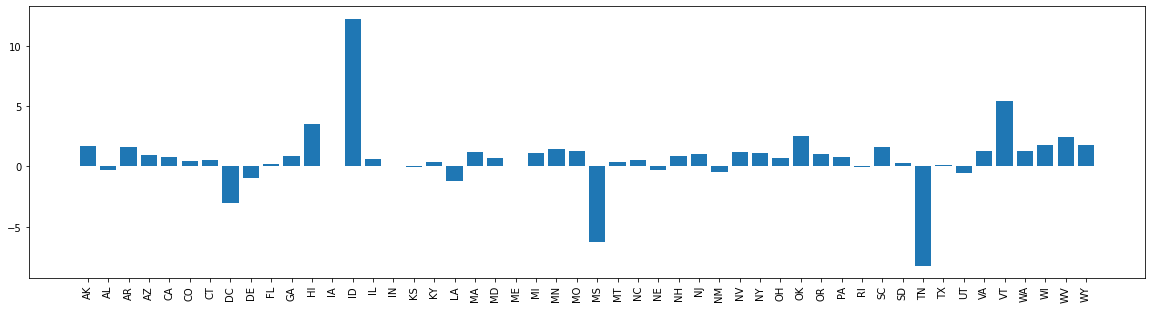

In [787]:
fig = plt.figure(figsize = (20,5))
plt.bar(df_dti_impact_across_state.index, df_dti_impact_across_state['Difference'])
plt.xticks(rotation = 90)
plt.show()

#### 6.3. Analyzing impact of dti of loans across home owners to see impact on loan default

In [788]:
df_dti_impact_across_hw = pd.pivot_table(loan_filtered_analyse, values = 'dti',index = ['home_ownership'], columns = 'loan_status', aggfunc = np.mean)
df_dti_impact_across_hw['Difference'] = df_dti_impact_across_hw[1] - df_dti_impact_across_hw[0]

In [789]:
df_dti_impact_across_hw

loan_status,0,1,Difference
home_ownership,,,
MORTGAGE,13.160766,14.381057,1.220291
NONE,11.746667,NaN,NaN
OTHER,11.067632,13.511765,2.444133
OWN,13.319641,13.873463,0.553822
RENT,13.478257,13.920880,0.442623


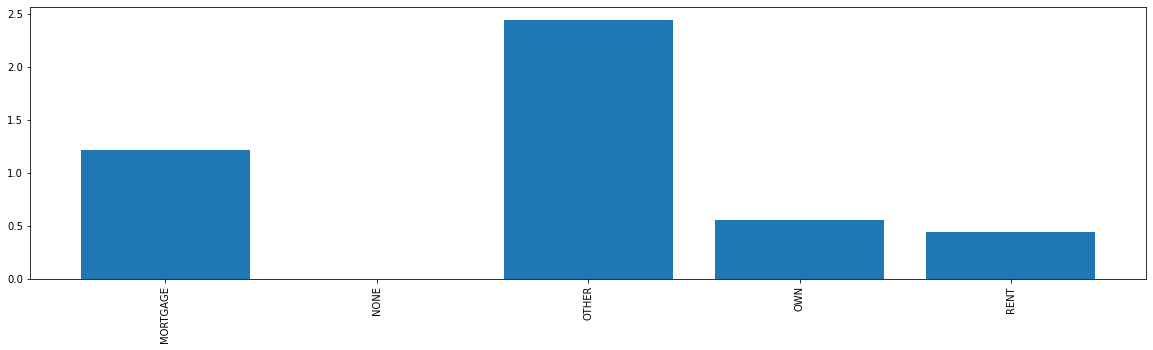

In [790]:
fig = plt.figure(figsize = (20,5))
plt.bar(df_dti_impact_across_hw.index, df_dti_impact_across_hw['Difference'])
plt.xticks(rotation = 90)
plt.show()

##### The data suggests Dti increases for loans which are default which is understandable since the EMI for the loan captures a bigger percentage of the borrower's monthly income.

## RESULTS

#### Following are the factors which influence the repayment capability of a loan.
1. Loan amount: Higher is the loan amount, higher are the chances that the loan will be defaulted. 
2. Annual income: Lower is the annual income of the borrower, lower are the chances of loan repayment. 
3. Interest Rates: Higher interest rates imply a higher interest on the principal, which implies higher probability of loan default. 
4. Loan Term: Higher is the loan term, higher is the chance of loan default. 
5. Dti: Higher is the dti, higher are the chances of loan default as the EMI as a percentage of monthly income is more.
6. Grade: Higher(G>A) is the loan grade assigned by LC, higher are the chances of loan default.

#### Observations

1. Small business(27% defaulting rate) loans have atleast 50% higher chanches of defaulting as compared to all other purposes(<=18% of defaulting rate)

#### Business derived metric 

Banks often evaluate the installment amount as a ratio of the person's take home salary to assess the person's loan repaying capability. This ratio is recommended to be within 30 to 35 Percent. 


In [791]:
# Showing the Business derived metric thorugh code
loan_filtered['monthly_inc'] = loan_filtered['annual_inc']/12
loan_filtered['emi/monthly_inc'] = loan_filtered['installment']/loan_filtered['monthly_inc']
del loan_filtered['monthly_inc']